<a href="https://colab.research.google.com/github/imranhassan87/NLP/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
!nvidia-smi

Sun Jun 14 05:13:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |    829MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [121]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  !pip install tf-nightly
except Exception:
  pass

import tensorflow as tf

%load_ext tensorboard

Uninstalling tb-nightly-2.3.0a20200613:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tb_nightly-2.3.0a20200613.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tb-nightly-2.3.0a20200613
  Using cached https://files.pythonhosted.org/packages/b9/c8/8abbb41da33322bb30090900c537c2dc46b1fa86edb66d14b5aa1f8b344c/tb_nightly-2.3.0a20200613-py3-none-any.whl


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [122]:
print(tf.__version__)

2.3.0-dev20200613


In [123]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard 2.2.2
tensorboard-plugin-wit 1.6.0.post3


In [124]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

rm: cannot remove '/usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info': No such file or directory


In [0]:
import tensorflow_datasets as tfds

In [0]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset  = dataset['train']

In [127]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [128]:
print(train_dataset)

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [129]:
len(list(train_dataset))

104975

In [0]:
BUFFER_SIZE=3000
BATCH_SIZE=128 #using mini-batch GD

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [132]:
for reviews in train_dataset.take(2):
    print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'13113064'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00O4D5GPS'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'844349050'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Sony ICFCS15IP 30-Pin iPod/iPhone Speaker Dock (Black) (Discontinued by Manufacturer) (Certified Refurbished)'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'I purchased this dock for my 11 year old daughters to charge her ipod. She loved the slim design because it fits on her small shelf. She also loves the sound and volume as well as dual alarms, one for school and one for sports.<br />Thank you'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2015-04-27'>, 'review

In [133]:
for reviews in train_dataset.take(5):
    review_text=reviews['data']
    print(review_text.get('review_body').numpy())
    print(review_text.get('star_rating'))
    print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b'I purchased this dock for my 11 year old daughters to charge her ipod. She loved the slim design because it fits on her small shelf. She also loves the sound and volume as well as dual alarms, one for school and one for sports.<br />Thank you'
tf.Tensor(5, shape=(), dtype=int32)
1
b'Ordered multiples of these months ago in case they break like every other iPhone charger and not one has broke nor does it have problems or show wear and tear'
tf.Tensor(5, shape=(), dtype=int32)
1
b'All I needed was a small step ladder and a screw driver.<br />Four east steps:<br />1 Screw it to the ceiling.<br />2 Plug it in.<br />3 Park you car in the desired spot.<br />4 Chose a specific spot on the vehicle you can see from the drivers seat and aim the laser to it.<br />I actually used it to mark two different cars in the same parking bay.<br />Just make sure you have an available outlet to plug it into.<br />They make a surge protector that is rectangular and has six outlets on it that plugs right in

In [0]:
tokenizer = tfds.features.text.Tokenizer()

In [135]:
vocabulary_set = set() #set method removes all the duplicates
for _,reviews in train_dataset.enumerate():
    #printing reviews
    review_text=reviews['data']
    reviews_tokens=tokenizer.tokenize(review_text.get('review_body').numpy())
    vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [0]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [137]:
# print(vocabulary_set)
print(len(vocabulary_set))


73738


In [138]:
for reviews in train_dataset.take(5):
    review_text=reviews['data']
    print('\n')
    print(review_text.get('review_body').numpy())
    encoded_example = encoder.encode(review_text.get('review_body').numpy())
    print(encoded_example)



b'I purchased this dock for my 11 year old daughters to charge her ipod. She loved the slim design because it fits on her small shelf. She also loves the sound and volume as well as dual alarms, one for school and one for sports.<br />Thank you'
[63498, 821, 19803, 653, 38245, 26644, 39983, 27312, 45790, 44634, 2501, 20944, 54274, 46261, 72043, 3605, 3813, 38803, 7837, 17655, 22102, 9599, 59922, 54274, 33648, 70992, 72043, 70423, 31975, 3813, 50661, 54291, 41314, 10672, 17748, 10672, 22918, 29137, 27249, 38245, 62368, 54291, 27249, 38245, 17366, 73559, 20671, 37899]


b'Ordered multiples of these months ago in case they break like every other iPhone charger and not one has broke nor does it have problems or show wear and tear'
[60711, 26646, 56758, 68197, 53242, 32280, 50348, 21188, 6029, 54152, 4078, 22910, 68059, 16407, 36408, 54291, 27302, 27249, 49922, 36150, 10901, 9079, 22102, 35942, 29956, 29309, 33363, 3286, 54291, 22416]


b'All I needed was a small step ladder and a screw d

In [139]:
for index in encoded_example:
    print('{} ---- {}'.format(index, encoder.decode([index])))

4717 ---- My
35899 ---- grandson
31975 ---- loves
3813 ---- the
38868 ---- clear
20929 ---- crystal
21188 ---- case
1442 ---- It
27302 ---- not
21107 ---- only
6501 ---- protects
3813 ---- the
14633 ---- iPod
48813 ---- Touch
72910 ---- but
59838 ---- all
3813 ---- the
25701 ---- features
71576 ---- are
19143 ---- still
908 ---- accessible
19979 ---- including
3813 ---- the
36408 ---- charger
71104 ---- The
30917 ---- price
43276 ---- was
20431 ---- great
70423 ---- also


In [0]:
def encode(text_tensor, label_tensor):
    encoded_text = encoder.encode(text_tensor.numpy())
    label = tf.where(label_tensor>=3,1,0)
    return encoded_text, label

In [0]:
def encode_map_fn(tensor):
    text = tensor['data'].get('review_body')
    label= tensor['data'].get('star_rating')
    
    encoded_text, label = tf.py_function(encode,inp=[text,label],Tout=(tf.int64,tf.int32))
    encoded_text.set_shape([None])
    label.set_shape([])
    
    return encoded_text, label

In [0]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [143]:
for t0,t1 in ar_encoded_data.take(2):
    print(t0)
    print(t1)

#here the encoded text and the label(0,1) will be printed

tf.Tensor(
[63498   821 19803   653 38245 26644 39983 27312 45790 44634  2501 20944
 54274 46261 72043  3605  3813 38803  7837 17655 22102  9599 59922 54274
 33648 70992 72043 70423 31975  3813 50661 54291 41314 10672 17748 10672
 22918 29137 27249 38245 62368 54291 27249 38245 17366 73559 20671 37899], shape=(48,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[60711 26646 56758 68197 53242 32280 50348 21188  6029 54152  4078 22910
 68059 16407 36408 54291 27302 27249 49922 36150 10901  9079 22102 35942
 29956 29309 33363  3286 54291 22416], shape=(30,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)


In [0]:
TAKE_SIZE = 10000 #for the test_data

train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE) #take the maximum length in the batch data and padd others according to it

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE) #in each batch padd with equal number of variables

#newer versions will also take padded_shapes as an arguement 
#padded_batch(BATCH_SIZE,padded_shapes = ([None],()))

In [0]:
vocab_size += 1 #add for the padded number in the vocab which is num=0

In [146]:
sample_text , sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(189,), dtype=int64, numpy=
 array([63498,   821, 19803,   653, 38245, 26644, 39983, 27312, 45790,
        44634,  2501, 20944, 54274, 46261, 72043,  3605,  3813, 38803,
         7837, 17655, 22102,  9599, 59922, 54274, 33648, 70992, 72043,
        70423, 31975,  3813, 50661, 54291, 41314, 10672, 17748, 10672,
        22918, 29137, 27249, 38245, 62368, 54291, 27249, 38245, 17366,
        73559, 20671, 37899,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [147]:
for f0,f1 in test_data.take(10):
    print(tf.unique_with_counts(f1)[2].numpy()) #unique_with_counts has much info(0,1,2) here we are just taking the second index info and number to print the value


# shows the no of sentiments in batch [1(+ve),0(-ve)]

[95 33]
[35 93]
[34 94]
[97 31]
[ 27 101]
[33 95]
[102  26]
[83 45]
[106  22]
[ 22 106]


In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64,64]:
    model.add(tf.keras.layers.Dense(units,activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1))

In [149]:
!rm -r /tmp/logs/

rm: cannot remove '/tmp/logs/': No such file or directory


In [0]:
import os
import datetime

logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="/tmp/sentiment_analysis.hdf5",verbose=1,save_best_only=True)

In [0]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [152]:
history = model.fit(train_data,epochs=5, validation_data=test_data,callbacks=[tensorboard_callback, checkpointer])

Epoch 1/5
      1/Unknown - 0s 15ms/step - loss: 0.6934 - accuracy: 0.2734WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


      2/Unknown - 1s 493ms/step - loss: 0.6835 - accuracy: 0.2227WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.3223s vs `on_train_batch_end` time: 0.6482s). Check your callbacks.


    742/Unknown - 269s 362ms/step - loss: 0.3035 - accuracy: 0.8637
Epoch 00001: val_loss improved from inf to 0.24398, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 287s 387ms/step - loss: 0.3035 - accuracy: 0.8637 - val_loss: 0.2440 - val_accuracy: 0.9037
Epoch 2/5
742/742 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9134
Epoch 00002: val_loss improved from 0.24398 to 0.23548, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 285s 384ms/step - loss: 0.2156 - accuracy: 0.9134 - val_loss: 0.2355 - val_accuracy: 0.8992
Epoch 3/5
742/742 [==============================] - ETA: 0s - loss: 0.1586 - accuracy: 0.9372
Epoch 00003: val_loss did not improve from 0.23548
742/742 [==============================] - 286s 385ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.2412 - val_accuracy: 0.9054
Epoch 4/5
742/742 [==============================] - ETA: 0s - loss: 0.1223 - accuracy: 

In [153]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
model.save("/content/gdrive/My Drive/Final_Sentiment_Analysis_Model.hdf5")

In [0]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [156]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 119845096 Jun 14 05:25 /tmp/sentiment_analysis.hdf5
-rw-r--r-- 1 root root 119845096 Jun 14 05:39 /tmp/final_sentiment_analysis.hdf5


In [157]:
eval_loss, eval_acc = model.evaluate(test_data)
print('\n Eval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

79/79 [==============================] - 16s 206ms/step - loss: 0.2752 - accuracy: 0.8956

 Eval loss: 0.275, Eval accuracy: 0.896


In [158]:
for t0,t1 in test_data.take(1):
  print(t1)
  print(model.predict(t0))


tf.Tensor(
[1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1], shape=(128,), dtype=int32)
[[ 6.9125366e+00]
 [-3.1645186e+00]
 [ 1.9859463e+00]
 [-2.1586421e+00]
 [ 7.6252060e+00]
 [-3.2670615e+00]
 [ 6.0594263e+00]
 [ 1.5079778e+00]
 [ 7.2347546e+00]
 [ 7.0641285e-01]
 [ 2.2817225e+00]
 [ 1.8986794e+00]
 [-4.7965503e+00]
 [ 4.9550314e+00]
 [ 2.0499859e+00]
 [ 4.1661997e+00]
 [-3.4070325e+00]
 [ 6.7914882e+00]
 [ 5.1444135e+00]
 [ 4.6980457e+00]
 [-5.8462793e-01]
 [-3.2802567e+00]
 [ 5.9078903e+00]
 [ 9.4229835e-01]
 [ 6.5498857e+00]
 [-4.5570173e+00]
 [ 1.8759025e+00]
 [ 3.7276034e+00]
 [ 1.7214513e+00]
 [ 5.3693705e+00]
 [ 2.6624222e+00]
 [ 4.8823886e+00]
 [ 7.7965307e+00]
 [ 6.7376156e+00]
 [ 4.5571308e+00]
 [ 4.2304406e-01]
 [ 3.0000541e-01]
 [ 5.1734300e+00]
 [ 5.3723793e+00

In [159]:
model.layers

In [160]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         164352    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4

In [0]:
#model.get_layer('embedding').output

In [162]:
!nvidia-smi

Sun Jun 14 05:40:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    53W / 250W |   8801MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [0]:
import matplotlib.pyplot as plt

def plot_graph(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], "")
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()


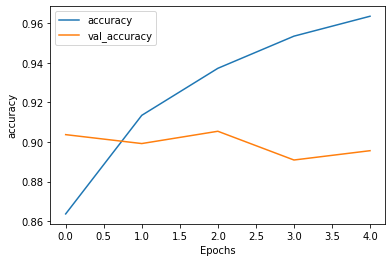

In [164]:
plot_graph(history,"accuracy")

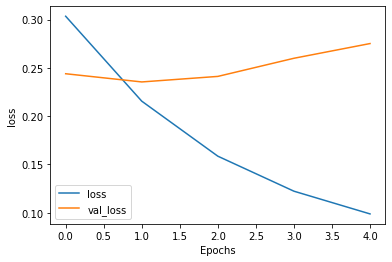

In [165]:
plot_graph(history,"loss")

In [0]:
#tf.keras.backend.clear_session()
sa_load = tf.keras.models.load_model('/tmp/final_sentiment_analysis.hdf5',compile=False)

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [0]:
# sa_load = tf.keras.models.load_model('/content/gdrive/My Drive/Final_Sentiment_Analysis.hdf5',compile=False)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/example.csv',encoding='utf-8')

In [170]:
df.head()

,ReviewTitles,StarRating,Review
0,What size you should get if you're built like me,4.0 out of 5 stars,I was indecisive on what size to get and I wen...
1,Just what i was looking for,5.0 out of 5 stars,This sweater is super soft! Wasn't too expensi...
2,"it fits perfect, a little bit snug but thats w...",5.0 out of 5 stars,"i got Small, im 5'2 and weight 105lb, it fits ..."
3,Cheap with Accurate Sizing,5.0 out of 5 stars,I'm 5'10 140lbs and this Medium fits perfectly...
4,Very nice!,5.0 out of 5 stars,It was a perfect fit!I very much recommend thi...


In [171]:
df['StarRating'].value_counts()

5.0 out of 5 stars    46
4.0 out of 5 stars    22
1.0 out of 5 stars    12
3.0 out of 5 stars    11
2.0 out of 5 stars     9
Name: StarRating, dtype: int64

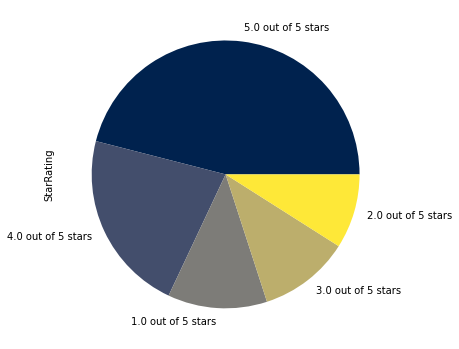

In [172]:
df['StarRating'].value_counts().plot(kind="pie",figsize=(6, 8),cmap='cividis')

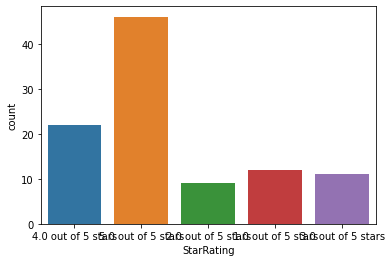

In [173]:
sns.countplot(data=df,x='StarRating')

In [0]:
rev = df['Review']

In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size -len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def predict_fn(pred_text):
  for rev in pred_text:
    encoded_pred_text = encoder.encode(rev)
    # print(encoded_pred_text)
    encoded_pred_text = pad_to_size(encoded_pred_text,300)
    # print(encoded_pred_text)
    encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
    predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))
    if predictions > 1:
      print("Sentiments of this product are positive, People are happy :)") 
      return predictions
    if predictions >= 0 and predictions <= 1:
      print("Sentiments of this product are Netural, People are just satisfied")
      return predictions
    if predictions < 1:
      return ("Sentiments of this product are negetive, People are not satisfied with this product")

In [191]:
predictions = predict_fn(rev)
print(predictions)

Sentiments of this product are positive, People are happy :)
[[2.2932026]]


In [0]:
#if you want to test out this model you can write sentiment yourself

In [0]:
def predict_fn_one_sentiment(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text,100)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  prediction = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))
  if prediction > 1:
    print("Sentiment of this review is positive :)") 
    return prediction
  if prediction >= 0 and prediction <= 1:
    print("Sentiment of this review is Netural,just satisfying")
    return prediction
  if prediction < 1:
    print("Sentiment of this product is negetive :(")
    return prediction
  

In [194]:
pred_text=input("Write sentense to check sentiment ")
prediction=predict_fn_one_sentiment(pred_text)
print(prediction)

Write sentense to check sentiment this has been the worst experiance ever
[19803, 49922, 26386, 3813, 12029, 18357, 48406]
[19803, 49922, 26386, 3813, 12029, 18357, 48406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sentiment of this product is negetive :(
[[-4.761191]]


In [0]:
pred_text=input("Write sentense to check sentiment ")
prediction=predict_fn_one_sentiment(pred_text)
print(prediction)

In [189]:
pred_text=("this is worse product")
prediction=predict_fn_one_sentiment(pred_text)
print(prediction)

[19803, 32926, 12523, 11997]
[19803, 32926, 12523, 11997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sentiment of this product is negetive :(
[[-3.3933616]]


In [190]:
pred_text=("this is good shirt, i really like it")
prediction=predict_fn_one_sentiment(pred_text)
print(prediction)

[19803, 32926, 62545, 39713, 2730, 32426, 4078, 22102]
[19803, 32926, 62545, 39713, 2730, 32426, 4078, 22102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sentiment of this review is positive :)
[[4.1341143]]
